 # Frequenzmischung: Mathematische Erklärung und Visualisierung



 Dieses Jupyter Notebook demonstriert, wie die Mischung (das Produkt) zweier Eingangsfrequenzen im Zeit- und Frequenzbereich dargestellt wird.



 Die mathematische Grundlage ist die trigonometrische Identität:



 $$\cos(\alpha) \cos(\beta) = \frac{1}{2} [\cos(\alpha - \beta) + \cos(\alpha + \beta)]$$



 Dies führt zu zwei neuen Frequenzkomponenten: der **Summenfrequenz** und der **Differenzfrequenz**.



 ## 1. Setup und Parameter



 Wir definieren die beiden Eingangsfrequenzen ($f_1$ und $f_2$) sowie die Amplitude und die Abtastrate für die Simulation.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# ------------------------------------
# A. Parameter definieren
# ------------------------------------
A1 = 1.0  # Amplitude Frequenz 1
f1 = 50   # Frequenz 1 in Hz (z.B. das Signal)
A2 = 0.8  # Amplitude Frequenz 2
f2 = 40   # Frequenz 2 in Hz (z.B. der Lokaloszillator)

# Berechnete Mischfrequenzen (Erwartungswert)
f_sum = f1 + f2     # Erwartet: 90 Hz
f_diff = abs(f1 - f2) # Erwartet: 10 Hz

# ------------------------------------
# B. Abtastparameter
# ------------------------------------
fs = 1000 # Abtastrate (Sampling Frequency). Muss groß genug sein.
T = 1 / fs # Abtastintervall
t_max = 1.0 # Simulationsdauer in Sekunden
t = np.arange(0, t_max, T) # Zeitachse

print(f"Eingangsfrequenzen: f1 = {f1} Hz, f2 = {f2} Hz")
print(f"Erwartete Mischprodukte: Summe = {f_sum} Hz, Differenz = {f_diff} Hz")



Eingangsfrequenzen: f1 = 50 Hz, f2 = 40 Hz
Erwartete Mischprodukte: Summe = 90 Hz, Differenz = 10 Hz


 ## 2. Erzeugung und Mischung der Signale



 Die Signale werden als Kosinusfunktionen erstellt. Die Mischung $S_{out}$ erfolgt durch die **Multiplikation** der beiden Eingangssignale $S_1$ und $S_2$.



In [3]:
# Eingangssignale
S1 = A1 * np.cos(2 * np.pi * f1 * t)
S2 = A2 * np.cos(2 * np.pi * f2 * t)

# Mischsignal (Produkt)
# S_out(t) = S1(t) * S2(t)
S_out = S1 * S2

print("Signale erfolgreich im Zeitbereich generiert und gemischt.")



Signale erfolgreich im Zeitbereich generiert und gemischt.


 ## 3. Visualisierung des Zeitverlaufs



 Der Plot zeigt die beiden Eingangssignale und das resultierende Mischsignal $S_{out}$ im Zeitbereich. Man erkennt bereits, dass $S_{out}$ eine kompliziertere Wellenform mit einer langsamen (Differenzfrequenz) und einer schnellen (Summenfrequenz) Hüllkurve aufweist.



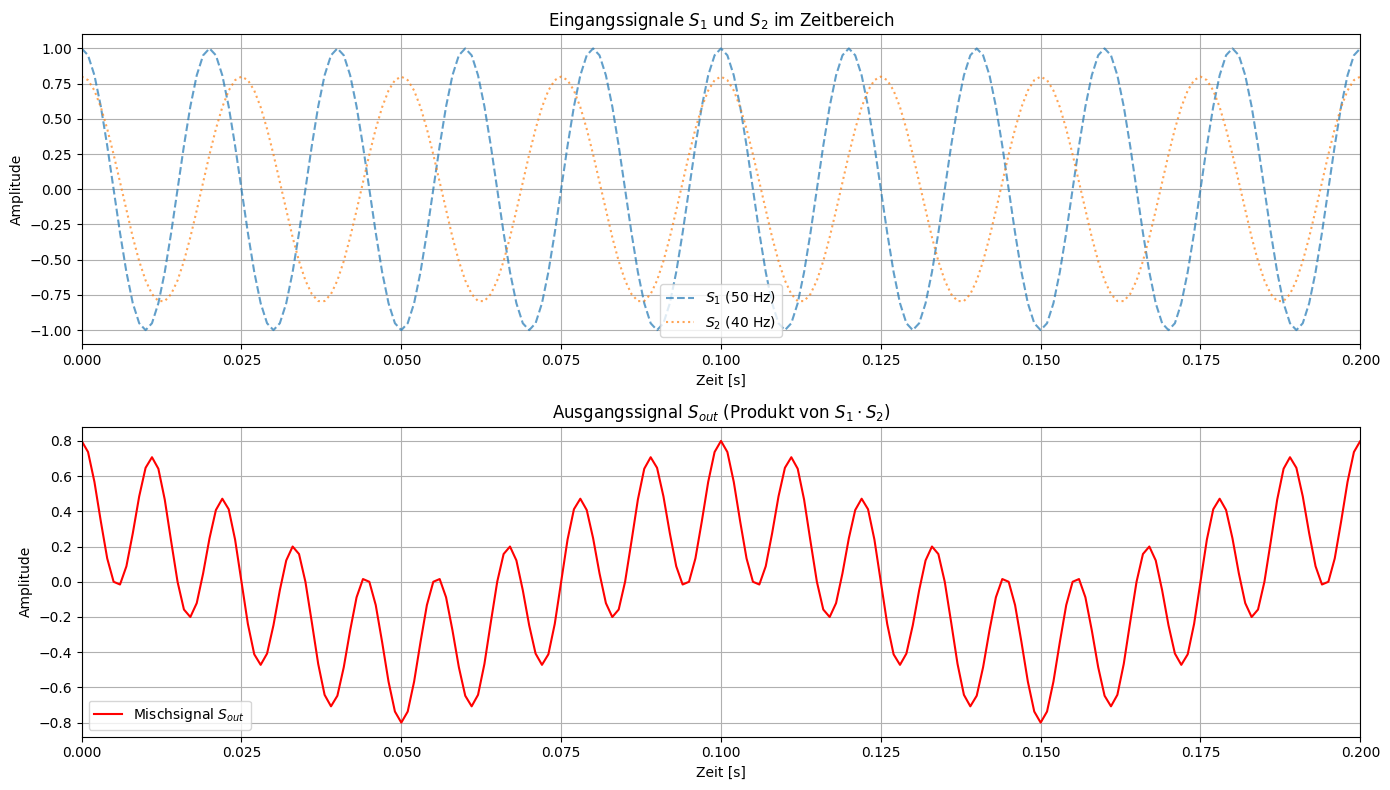

In [4]:
plt.figure(figsize=(14, 8))

# Subplot 1: Eingangssignale
plt.subplot(2, 1, 1)
plt.plot(t, S1, label=f'$S_1$ ({f1} Hz)', linestyle='--', alpha=0.7)
plt.plot(t, S2, label=f'$S_2$ ({f2} Hz)', linestyle=':', alpha=0.7)
plt.title(f'Eingangssignale $S_1$ und $S_2$ im Zeitbereich')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.2) # Zoom für bessere Sichtbarkeit
plt.legend()
plt.grid(True)

# Subplot 2: Mischsignal
plt.subplot(2, 1, 2)
plt.plot(t, S_out, label='Mischsignal $S_{out}$', color='red')
plt.title('Ausgangssignal $S_{out}$ (Produkt von $S_1 \cdot S_2$)')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.2)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



 ## 4. Frequenzanalyse (FFT Spektrum)



 Um die Summen- und Differenzfrequenzen eindeutig nachzuweisen, nutzen wir die **Fast Fourier Transformation (FFT)**. Im resultierenden Spektrum müssen Peaks bei **10 Hz** ($f_{diff}$) und **90 Hz** ($f_{sum}$) sichtbar sein.



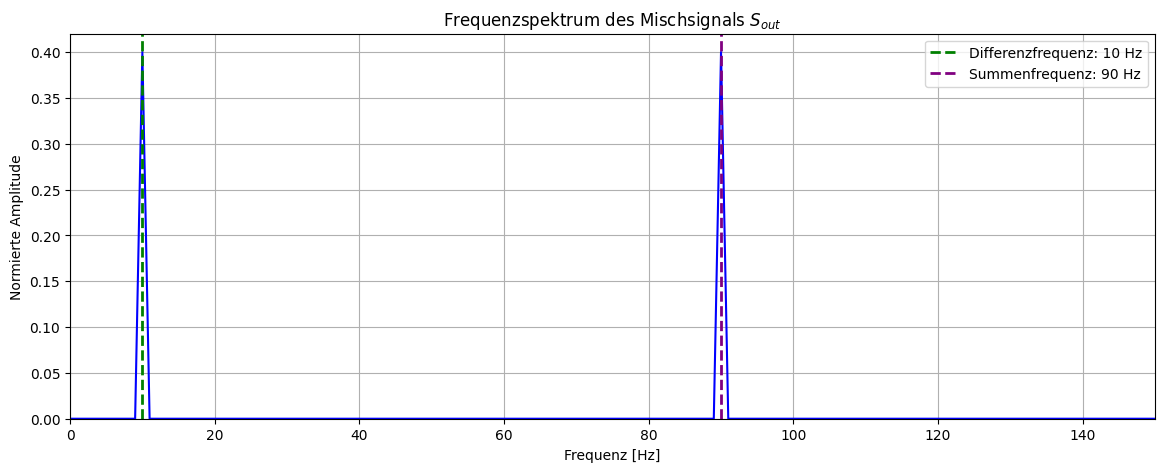

In [5]:
# ------------------------------------
# A. FFT Berechnung
# ------------------------------------
N = len(S_out) # Anzahl der Datenpunkte
yf = fft(S_out)

# Frequenzachse (nur positive Hälfte)
xf = fftfreq(N, T)[:N//2]

# Amplitudenspektrum (normierter Betrag der FFT)
# Multiplikation mit 2.0/N für die korrekte Amplitude des Einzelseitenspektrums
amplitude_spectrum = 2.0/N * np.abs(yf[0:N//2])

# ------------------------------------
# B. Plot des Spektrums
# ------------------------------------
plt.figure(figsize=(14, 5))
plt.plot(xf, amplitude_spectrum, color='blue')
plt.title('Frequenzspektrum des Mischsignals $S_{out}$')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Normierte Amplitude')
plt.xlim(0, 150) # Fokus auf den relevanten Bereich
plt.ylim(0)

# Hervorhebung der Mischfrequenzen
plt.axvline(f_diff, color='green', linestyle='--', linewidth=2, label=f'Differenzfrequenz: {f_diff} Hz')
plt.axvline(f_sum, color='purple', linestyle='--', linewidth=2, label=f'Summenfrequenz: {f_sum} Hz')

plt.legend()
plt.grid(True)
plt.show()



 ## 5. Ergebnis



 Der Frequenz-Plot zeigt deutlich Peaks bei **10 Hz** und **90 Hz**, was die mathematische Aussage:



 $$\cos(\omega_1 t) \cos(\omega_2 t) \propto \cos((\omega_1 - \omega_2) t) + \cos((\omega_1 + \omega_2) t)$$



 **bestätigt**.